# Learning a function f
Machine learning algorithms aim to **learn a target function $f$** that best maps input variables ($X$) to an output variable ($Y$):


$$ Y = f(X) $$

What function $f$ *exactly* is or *how* it looks, is not known. And exactly that (what the function $f$ has to be) is the part that Machine Learning tries to learn from the data.


## Making predictions

The main goal of machine learning is to learn the underlying function in order to **make predictions** of $Y$ for new $X$ (unseen data). When we *train* or *learn* a machine learning model we are *estimating* the target function (the target function is the best mapping from $Y$ given $X$ from the data that is available). Usually a lot of time is spent trying to improve this estimate of the unknown target function in order to improve performance of the predictions made by the model. 

# vectorisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 8]

## dummy data
Let us make some dummy data $X$. This is a matrix that contains $n$ observations, each observations having $k$ features, thus forming an $n \times k$ matrix.

In [2]:
np.random.seed(42)
n = 1000
k = 3
X = np.random.randint(10, size=(n, k))

print(X)

[[6 3 7]
 [4 6 9]
 [2 6 7]
 ...
 [2 0 6]
 [9 4 4]
 [0 8 6]]


In this example, the first observation consists of three features. The first feature has a value of 6, the second of 3, the third of 7. To make predicication, we will want to learn what weight we should assign to every feature. Not every feature will be as important in predicting an outcome. This will depend on what we want to predict.

However, at the beginning of each learning algorithm we will randomize the weights.

In [3]:
np.random.seed(42)
W = np.random.rand(k, 1)
W

array([[0.37454012],
       [0.95071431],
       [0.73199394]])

The goal will be to learn the proper weights for our type of prediction.

E.g. If the features are length, weight and body temperature, the first two features will be roughly equally important in predicting the size of someones clothes, while the third will be of no importance. 

The final weights for this case might look something like $[0.9, 0.8, 0.01]$

However, for predicting shoe size, the first feature will be more important than the last one. We might get something like $[0.9, 0.3, 0.01]$. 

For predicting infections, the last feature will be the most imporant, e.g. $[0.01, 0.1, 0.9]$.



## Forloop
If we want to make a prediction, often denoted as $\hat{y}$ (y-hat), a very general way to do so is to multiply every feature with a weight:

$$\begin{equation}
\hat{y} = w_1 x_1 + \dots + w_n x_n
\end{equation}
$$

This approach is a basic element in many machine learning algorithms. We might add some extra tricks, like Baysian Statistics, SVM's or stacking Neural Network layers upon eachother.

A naive way to calculate this, would be while using a forloop. Making an empty matrix of zeros with the right shape is much faster then appending an outcome to a list.

In [4]:
def for_loop(X, W):
    result = np.zeros((X.shape[0],W.shape[1]))
    # for every observation
    for i, observation in enumerate(X):
        yhat = 0
        # we want to multiply every feature with a weight
        for j, feature in enumerate(observation):
            # and make a summation of every weigth * feature
            yhat += W[j] * feature
        result[i, 0] = yhat
    return(result)

We can time a piece of code like this. This will run the line enough times to obtain a good average.

In [5]:
looptime = %timeit -o for_loop(X, W)

9.53 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Now, let's scale that up and do a gridsearch:

In [6]:
np.random.seed(42)
nrange = range(2,5)
krange = range(1,3)
heatmap_for = np.zeros((len(nrange),len(krange)))

for i, n in enumerate([10**i for i in nrange]):
    for j, k in enumerate([10**i for i in krange]):
        X = np.random.randint(10, size=(n, k))
        W = np.random.rand(k, 1)
        looptime = %timeit -o for_loop(X, W)
        heatmap_for[i, j] = looptime.average


2.9 ms ± 80.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
27.8 ms ± 654 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
28.4 ms ± 475 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
272 ms ± 5.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
285 ms ± 5.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.73 s ± 90.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


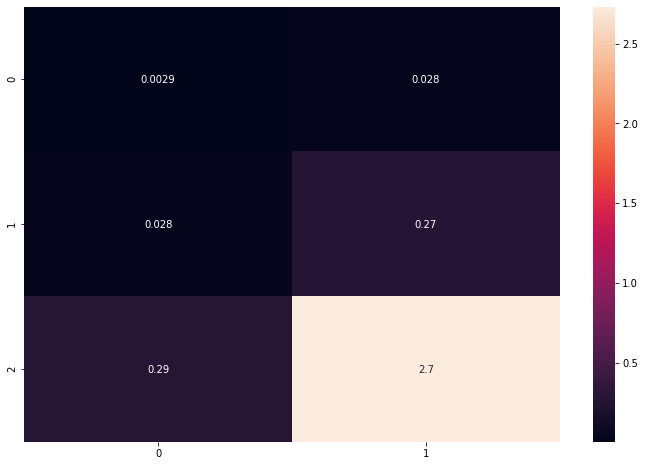

In [10]:
sns.heatmap(heatmap_for, annot=heatmap_for)

On my laptop, I get results that:
- scale linear: multiplying the amount of observations or features by 10, will add about a factor of 10 to the time.
- ranges between 0.0029 sec (for 100 observations with one feature) and 2.7 sec (for 10.000 observations and 100 features) on average.

## vectorisation
Now, we will vectorize this calculation.

Note that, for matrix multiplication to work, we will need the dimensions of the two matrices to match. If our first matrix $X$ has dimensions $(n, k)$ and our second matrix $W$ has dimensions $(k, m)$, we are able to do $X \dot W$ because the dimension $k$ is equal.

So, trying to do a matrix multiplication with dimensions (10, 3) and (3, 1) will work, but (10,3) and (4,1) will fail because $3\neq 4$.

Also, trying to multiply (3,1) and (10, 3) will fail because $1 \neq 10$. This means the order is important. This is different from normal multiplication, where $2 \times 3$ and $3 \times 2$ both equal to 6.

Let's say our data has $n=2$ cases ($a$ and $b$), where we observe $k=2$ features for every case. We now need two weights $w_1$ and $w_2$, one for every feature. A matrix multiplication would do exactly what we did with the forloop:

$$
\begin{bmatrix}
a_{1} & a_2 \\
b_{1} & b_{2}
\end{bmatrix}
\begin{bmatrix}
w_1 \\
w_2
\end{bmatrix}
=
\begin{bmatrix}
a_1*w_1 + a_2*w_2\\
b_1*w_1 + b_2*w_2
\end{bmatrix}
$$

If we implement the same formula, we see that everything gets much more compact.

In [12]:
def vectorisation(X, W):
    return np.dot(X, W)

Lets run the same experiment, but just swap the forloop.

In [13]:
np.random.seed(42)
nrange = range(2,5)
krange = range(1,3)
heatmap_vec = np.zeros((len(nrange),len(krange)))

for i, n in enumerate([10**i for i in nrange]):
    for j, k in enumerate([10**i for i in krange]):
        X = np.random.randint(10, size=(n, k))
        W = np.random.rand(k, 1)
        looptime = %timeit -o vectorisation(X, W)
        heatmap_vec[i, j] = looptime.average

2.07 µs ± 12.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.76 µs ± 221 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
8.99 µs ± 89.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
65.8 µs ± 10 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
69.1 µs ± 2.22 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
906 µs ± 24.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


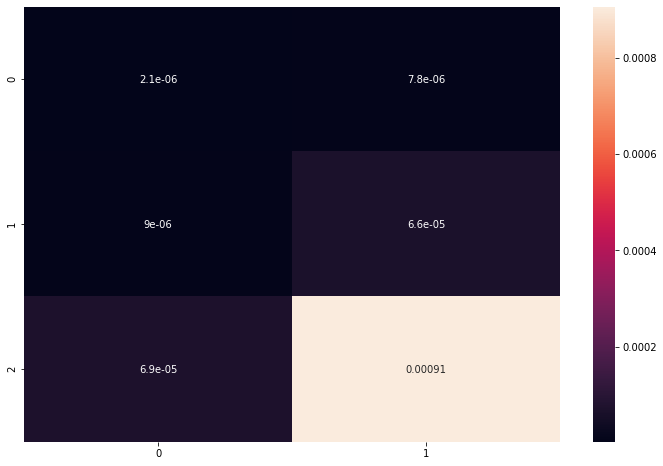

In [14]:
sns.heatmap(heatmap_vec, annot=heatmap_vec)

I think this is impressive. Not only is the linear scaling gone, but this is really an amazing amount faster!

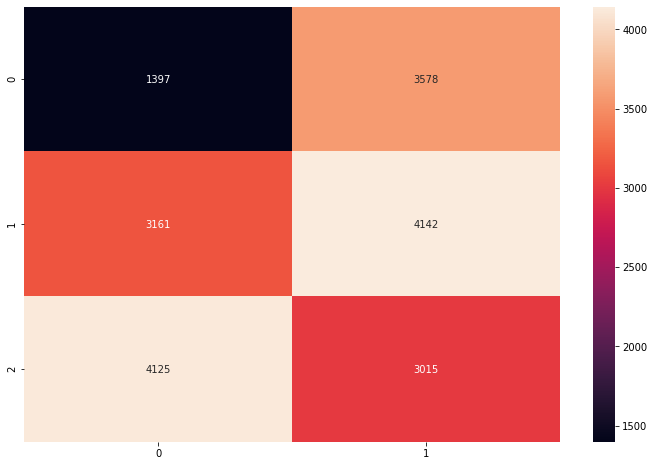

In [18]:
speedup = heatmap_for / heatmap_vec
sns.heatmap(speedup, annot=speedup,fmt='.0f')

Yes, that is right. For the very small case (100 observations, 1 feature) the speedup is about 1400 times (which is already impressive!!), but it get's even better on larger scales where we get a speedup of a factor 3000, even above 4000!

I hope you can imagine how extremely useful this can be.

The same can be done with other functions, like calculating a sine:

In [19]:
X = np.random.rand(100)
%timeit for x in X: np.sin(x)

124 µs ± 3.94 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


But, instead of the forloop, we can do that in way that is both simpler and faster:

In [20]:
%timeit np.sin(X)

1.16 µs ± 12.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Which gives us the exact same results.

In addition to this, we don't have to worry too much about adding extra dimensions. Numpy simply scales things:

In [21]:
X = np.random.rand(100,100)
x1 = np.log(X)
x2 = np.exp(X)
X = np.random.rand(10, 10, 10)
x3 = np.sin(X)

A variation on matrix multiplication is element wise multiplication, also known as the Hadamard product. Compare the two examples below:

In [22]:
A = np.array([[1,2],
              [3,4]])

B = np.array([[10,20],
              [30,40]])
np.dot(A, B)

array([[ 70, 100],
       [150, 220]])

Here, we calculate $(1 \times 10) + (2 \times 30)$ for the first entry, which is 70.

However, what if we wanted to multiply every element with the same element in the other matrix (so, every element at position $(i,j)$ in $A$ is multiplied with every $(i,j)$ element in $B$).

In [23]:
np.multiply(A, B)

array([[ 10,  40],
       [ 90, 160]])

This equals to:

In [ ]:
A * B

# Broadcasting

Broadcasting referes to how numpy handles arrays with different shapes. In general, the smaller array is "broadcast" across the larger array to get compatible shapes. Multiplying 1-dimensional array of the same length performs a element-wise multiplication:

In [42]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([1.0, 2.0, 3.0])
a * b 

array([1., 4., 9.])

However, if the dimensions don't match, we get an error:

In [43]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([1.0, 2.0, 3.0, 4.0])
try:
     a * b 
except Exception as e:
    print('Error:', e)

Error: operands could not be broadcast together with shapes (3,) (4,) 


But this constraint is relaxed when the dimensions meet certain constraints:

In [44]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b 

array([2., 4., 6.])

Which is equivalent to

In [45]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b 

array([2., 4., 6.])

But just shorter. In the first case, we can think of `b` being strethced to an array of the same shape as `a`.

In general, two dimensions are compatible when:
1. they are equal
2. one of them is 1

In addition to this, array's do not need to have the same number of dimensions. Eg an image with dimensions of `256x256` pixels can have three colors. This results in a `256x256x3` shape matrix. If we want to scale each color, we can use a 1-dimensional array with 3 values.

In [48]:
image = np.random.rand(256, 256, 3)
scale = np.array([2, 3, 6])
output = image * scale
output.shape

(256, 256, 3)

In [49]:
scale

array([2, 3, 6])

This "broadcasting" works along multiple dimensions

In [50]:
A = np.random.rand(15, 3, 5)
B = np.random.rand(15, 1, 5)
C = A * B
C.shape

(15, 3, 5)

Or more complex:

In [51]:
A = np.random.rand(8, 1, 6, 1)
B = np.random.rand(7, 1, 5)
C = A*B
C.shape

(8, 7, 6, 5)

Can you figure out what happened here?

# Exercise
You receive data from 1000 patients. For every patient, there are 8 features.

In [52]:
np.random.seed(42)
n = 1000
k = 8
X = np.random.rand(n, k)
X.shape

(1000, 8)

You want to build a simple linear model, and start by implementing the formula $f(x) = \sum_{i=1}^n w_i * x_i $

First, you initialize random weights. If you want to use matrix multiplication, what is the shape you need for the weights?

If you multiply $X$ with $W$, what do you expect the shape of the outcome to be? In the outcome, what is the meaning of every row? And every column? Implement the forumula by using `np.dot`. Did you get the dimensions right?

Now, assume that instead of predicting one outcome, you want to predict two different things (e.g., both the expected duration of a stay, and the chance of complications during the stay). Every patient still has 8 features, but the outcome should be two numbers, instead of one.

How do you need to change the shape of $W$?

What is the expected shape if you apply matrix multiplication between $X$ and $W$? What would happen if you multiply $W$ and $X$?

Create $W$ and implement the new calculation. How does this differ from the calculation with just one outcome?